In [2]:
# ===============================
# Environment Setup
# ===============================
USE_COLAB = True

if USE_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    PROJECT_ROOT = "/content/drive/MyDrive/Information-Extraction-from-Image"
else:
    PROJECT_ROOT = os.path.abspath(".")

print("PROJECT_ROOT:", PROJECT_ROOT)


Mounted at /content/drive
PROJECT_ROOT: /content/drive/MyDrive/Information-Extraction-from-Image


In [3]:
# ===============================
# Install dependencies
# ===============================
!pip install -r {PROJECT_ROOT}/requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.2/978.2 kB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 112.0 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existin

In [4]:
# ===============================
# Standard Library
# ===============================
import os
import sys
import shutil
import random
import pickle

# ===============================
# Third-party Libraries
# ===============================
import cv2
import yaml
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import ultralytics
from ultralytics import YOLO

# ===============================
# Project Configuration
# ===============================

if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)
CACHE_DIR = os.path.join(PROJECT_ROOT, "cache")
MODEL_DIR = os.path.join(PROJECT_ROOT, "model", "yolo")

os.makedirs(CACHE_DIR, exist_ok=True)
os.makedirs(MODEL_DIR, exist_ok=True)

from src.detection import (
    extract_data_from_xml,
    convert_to_yolo_format,
    save_yolo_data,
)

ultralytics.checks()


Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.7/112.6 GB disk)


# 1. Extract Data from XML for Detection

In [5]:
dataset_dir = f"{PROJECT_ROOT}/datasets/SceneTrialTrain"
words_xml_path = os.path.join(dataset_dir, "words.xml")
image_paths, image_sizes, image_labels, bounding_boxes = extract_data_from_xml(
    words_xml_path
)

In [6]:
print(f"Number of images: {len(image_paths)}")
print(f"Example image path: {image_paths[0]}")
print(f"Example image size: {image_sizes[0]}")
print(f"Example bounding boxes: {bounding_boxes[0][:2]}")
print(f"Example labels: {image_labels[0][:2]}")

Number of images: 250
Example image path: apanar_06.08.2002/IMG_1261.JPG
Example image size: (1600, 1200)
Example bounding boxes: [[174.0, 392.0, 274.0, 195.0], [512.0, 391.0, 679.0, 183.0]]
Example labels: ['self', 'adhesive']


# 2. Convert to YOLO Format

In [7]:
yolo_data = convert_to_yolo_format(image_paths, image_sizes, bounding_boxes)
print(f"Number of YOLO data: {len(yolo_data)}")
print(f"Example YOLO data: {yolo_data[0]}")

Number of YOLO data: 250
Example YOLO data: ('apanar_06.08.2002/IMG_1261.JPG', [[0, 0.194375, 0.40791666666666665, 0.17125, 0.1625], [0, 0.5321875, 0.40208333333333335, 0.424375, 0.1525], [0, 0.309375, 0.5825, 0.38875, 0.145], [0, 0.67875, 0.5770833333333333, 0.27875, 0.15583333333333332], [0, 0.0746875, 0.04125, 0.059375, 0.0725], [0, 0.2159375, 0.03833333333333333, 0.123125, 0.07333333333333333], [0, 0.5309375, 0.03375, 0.071875, 0.0675], [0, 0.19625, 0.7645833333333333, 0.1425, 0.11583333333333333], [0, 0.3471875, 0.7770833333333333, 0.103125, 0.09083333333333334], [0, 0.4496875, 0.7758333333333334, 0.044375, 0.08833333333333333], [0, 0.571875, 0.7620833333333333, 0.13625, 0.1175]])


# 3. Train/Val Split for Detection

In [8]:
train_yolo_data, val_yolo_data = train_test_split(
    yolo_data, test_size=0.2, random_state=42
)

print(f"Train YOLO data: {len(train_yolo_data)}")
print(f"Val YOLO data: {len(val_yolo_data)}")

Train YOLO data: 200
Val YOLO data: 50


# 4. Save YOLO Data

In [16]:
save_yolo_data_dir = f"{PROJECT_ROOT}/yolo_data"
save_yolo_data(train_yolo_data, "train", save_yolo_data_dir, dataset_dir)
save_yolo_data(val_yolo_data, "val", save_yolo_data_dir, dataset_dir)

with open(os.path.join(CACHE_DIR, "val_data.pkl"), "wb") as f:
    pickle.dump(
        {
            "val_yolo_data": val_yolo_data,
            "image_paths": image_paths,
            "image_labels": image_labels,
            "bounding_boxes": bounding_boxes,
        },
        f,
    )


# 5. Create YOLO Config YAML

In [10]:
class_labels = ["text"]
data_yaml = {
    "path": os.path.abspath(save_yolo_data_dir),
    "train": "train/images",
    "val": "val/images",
    "nc": 1,
    "names": class_labels,
}

yolo_yaml_path = os.path.join(save_yolo_data_dir, "data.yml")
with open(yolo_yaml_path, "w") as f:
    yaml.dump(data_yaml, f, default_flow_style=False)

print(f"YOLO config saved to: {yolo_yaml_path}")

YOLO config saved to: yolo_data/data.yml


# 6. Visualize YOLO training data

YOLO Training Data Visualization
Total train images: 200
Total val images: 50


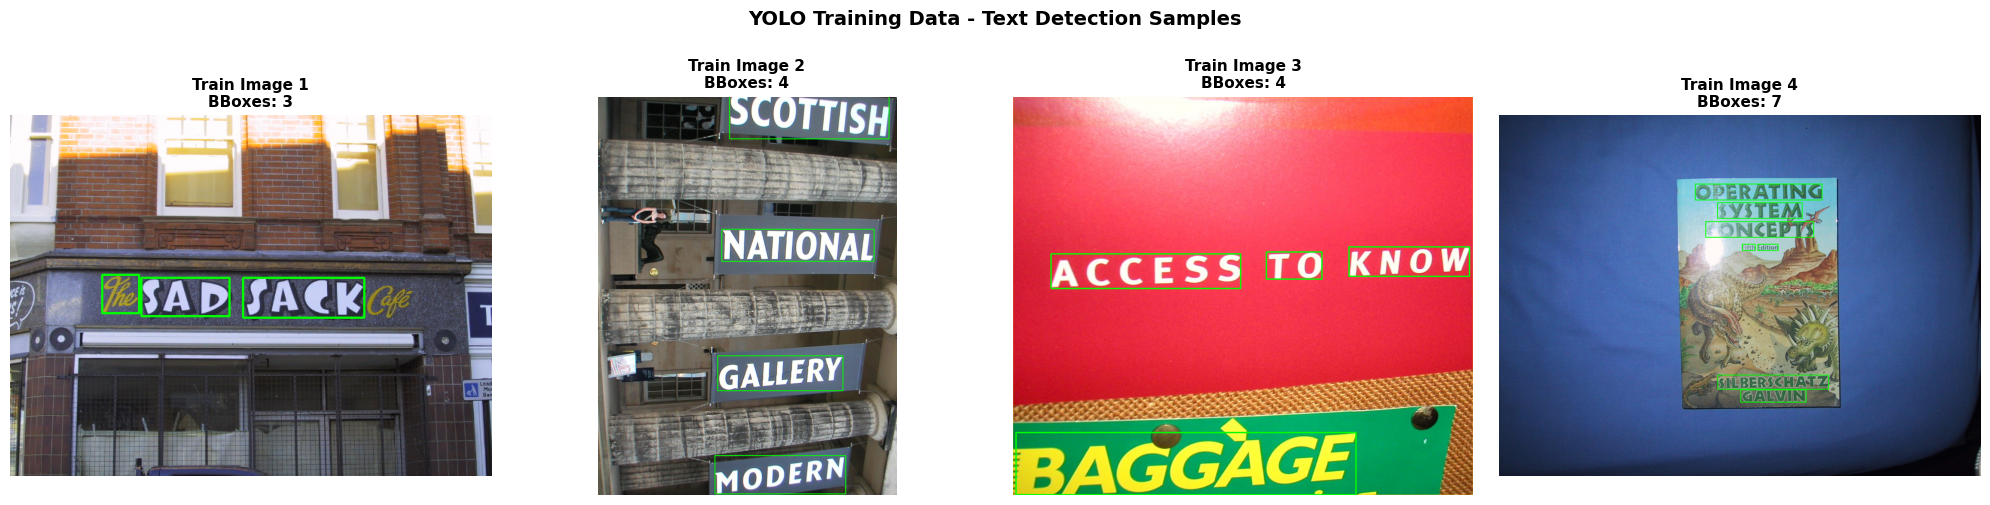

In [11]:
# Visualize YOLO training data
print("YOLO Training Data Visualization")
print("=" * 80)
print(f"Total train images: {len(train_yolo_data)}")
print(f"Total val images: {len(val_yolo_data)}")

# Display sample train images with bounding boxes
sample_train = random.sample(train_yolo_data, min(4, len(train_yolo_data)))

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for idx, (img_path, yolo_bbs) in enumerate(sample_train):
    full_path = os.path.join(dataset_dir, img_path)
    img = cv2.imread(full_path)
    if img is None:
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]

    # Draw bounding boxes
    for bb in yolo_bbs:
        cls, x_center, y_center, bbox_w, bbox_h = bb
        x1 = int((x_center - bbox_w / 2) * w)
        y1 = int((y_center - bbox_h / 2) * h)
        x2 = int((x_center + bbox_w / 2) * w)
        y2 = int((y_center + bbox_h / 2) * h)

        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    axes[idx].imshow(img)
    axes[idx].set_title(f"Train Image {idx+1}\nBBoxes: {len(yolo_bbs)}", fontsize=11, fontweight='bold')
    axes[idx].axis('off')

plt.suptitle('YOLO Training Data - Text Detection Samples', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# 7. Train YOLO Model

In [12]:
# Load YOLO model
yolo_model = YOLO("yolo11m.pt")

# Train model
yolo_results = yolo_model.train(
    data=yolo_yaml_path,
    epochs=80,
    imgsz=640,
    cache=True,
    patience=20,
    plots=True,
)

Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=yolo_data/data.yml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=80, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=True, pose=12.0, pretrai

#8. Evaluate YOLO Model

In [13]:
src_model = "runs/detect/train/weights/best.pt"
dst_model = f"{PROJECT_ROOT}/model/yolo/best.pt"

os.makedirs(os.path.dirname(dst_model), exist_ok=True)
shutil.copy(src_model, dst_model)

yolo_model = YOLO(dst_model)
yolo_metrics = yolo_model.val()


Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2070.7±589.5 MB/s, size: 267.8 KB)
val: Scanning /content/yolo_data/val/labels.cache... 50 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 50/50 107.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.3it/s 3.1s
                   all         50        227      0.873       0.78      0.828      0.657
Speed: 8.5ms preprocess, 27.8ms inference, 0.1ms loss, 3.3ms postprocess per image
Results saved to /content/runs/detect/val


# 9. YOLO training curves

In [14]:
results_path = "runs/detect/train/results.csv"
df = pd.read_csv(results_path)

print(df.columns)

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


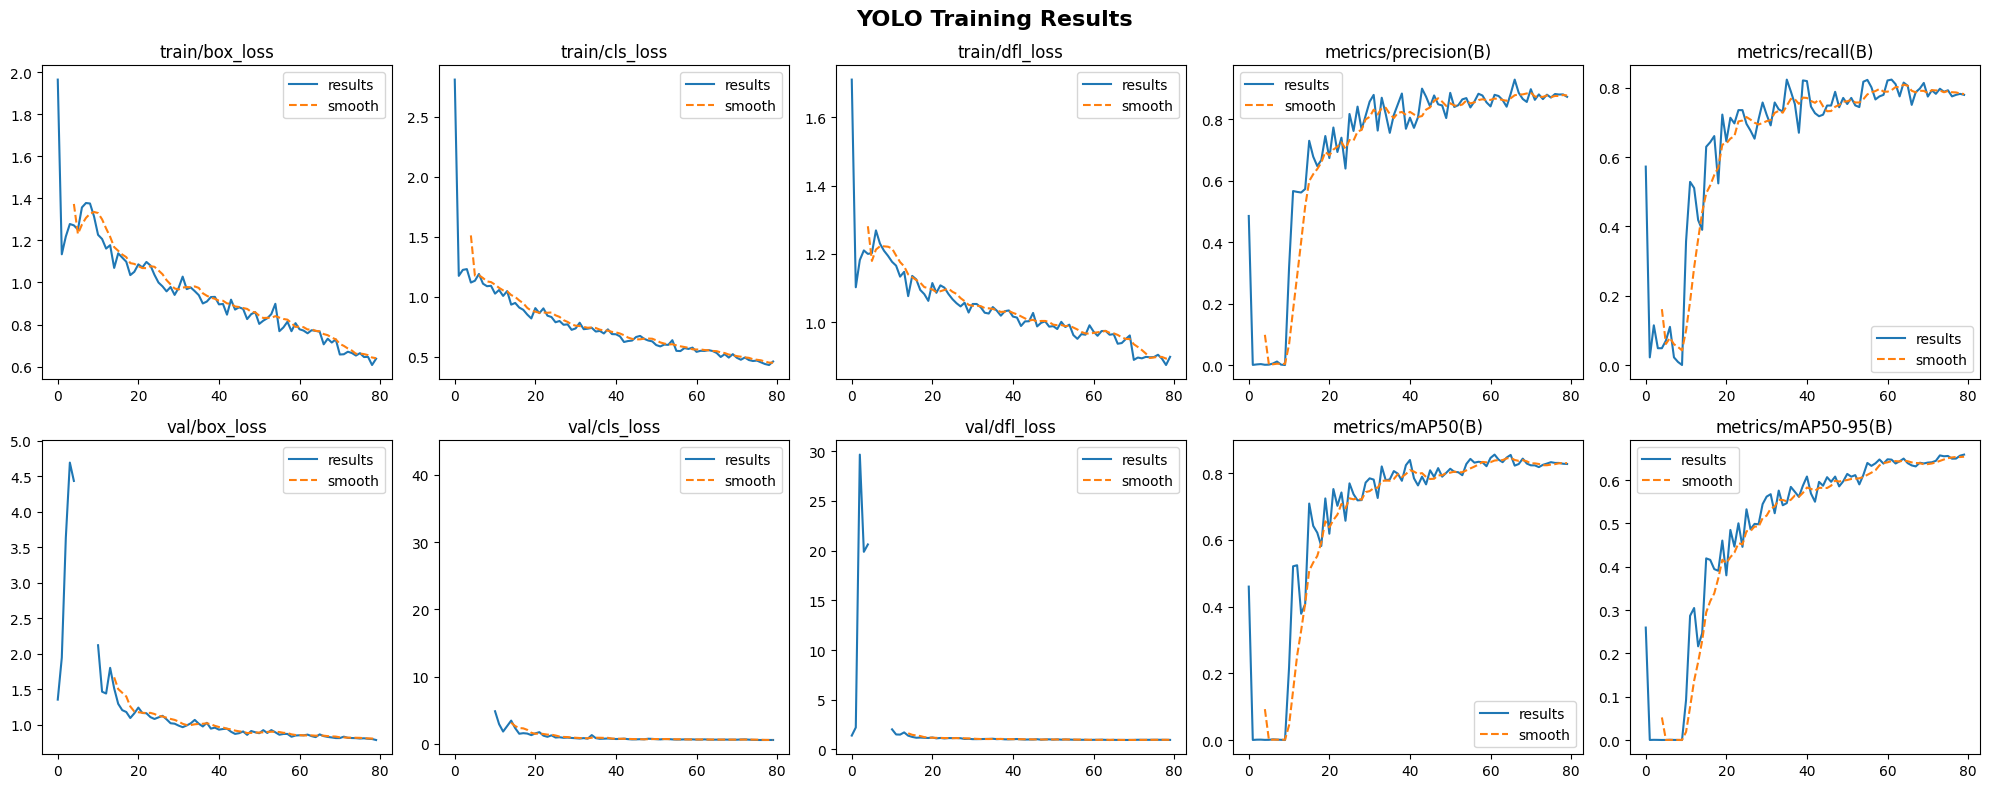

In [15]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

plots = [
    ("train/box_loss", "train/box_loss"),
    ("train/cls_loss", "train/cls_loss"),
    ("train/dfl_loss", "train/dfl_loss"),
    ("metrics/precision(B)", "metrics/precision(B)"),
    ("metrics/recall(B)", "metrics/recall(B)"),

    ("val/box_loss", "val/box_loss"),
    ("val/cls_loss", "val/cls_loss"),
    ("val/dfl_loss", "val/dfl_loss"),
    ("metrics/mAP50(B)", "metrics/mAP50(B)"),
    ("metrics/mAP50-95(B)", "metrics/mAP50-95(B)")
]

for ax, (col, title) in zip(axes, plots):
    ax.plot(df[col], label="results")
    ax.plot(df[col].rolling(5).mean(), linestyle="--", label="smooth")
    ax.set_title(title)
    ax.legend()

plt.suptitle("YOLO Training Results", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()
